## 1. Introduction to Logistic Regression 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os 
import warnings

warnings.filterwarnings('ignore')

# Import dataset

In [13]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /home/ali/Desktop/data-analysis/notebook/supervisor learning


In [14]:
df = pd.read_csv('../../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Exploratory data analysis

In [15]:
df.shape

(259908, 24)

In [16]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM           True
RainTomorrow      True
dtype: bool

In [17]:
col_names = df.columns 
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


# Drop RISK_MM variable

It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description. So, we should drop it as follows

In [18]:
df.drop(['RISK_MM'], axis=1, inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259908 entries, 0 to 259907
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           259908 non-null  object 
 1   Location       259908 non-null  object 
 2   MinTemp        255308 non-null  float64
 3   MaxTemp        255373 non-null  float64
 4   Rainfall       251949 non-null  float64
 5   Evaporation    111743 non-null  float64
 6   Sunshine       101224 non-null  float64
 7   WindGustDir    240668 non-null  object 
 8   WindGustSpeed  240862 non-null  float64
 9   WindDir9am     239650 non-null  object 
 10  WindDir3pm     248385 non-null  object 
 11  WindSpeed9am   254453 non-null  float64
 12  WindSpeed3pm   250031 non-null  float64
 13  Humidity9am    253840 non-null  float64
 14  Humidity3pm    248930 non-null  float64
 15  Pressure9am    231248 non-null  float64
 16  Pressure3pm    231270 non-null  float64
 17  Cloud9am       142142 non-nul

Types of variables 

In [20]:
categorical = [var for var  in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [21]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [22]:
cat1 = [var for var in categorical if df[var].isnull().sum() != 0]

df[cat1].isnull().sum()

WindGustDir     19240
WindDir9am      20258
WindDir3pm      11523
RainToday        7959
RainTomorrow     7959
dtype: int64

Frequency counts of categorical variables

In [23]:
for var in categorical:
    print(df[var].value_counts())

Date
2020-07-03    49
2020-06-18    49
2020-06-19    49
2020-06-20    49
2020-06-21    49
              ..
2008-01-11     1
2008-01-12     1
2008-01-13     1
2008-01-14     1
2008-01-31     1
Name: count, Length: 5841, dtype: int64
Location
Canberra            5841
Sydney              5749
Hobart              5598
Brisbane            5598
Melbourne           5598
Darwin              5598
Perth               5597
Wollongong          5445
Albury              5445
GoldCoast           5445
Townsville          5445
Cairns              5445
AliceSprings        5445
Launceston          5445
MountGambier        5444
Tuggeranong         5444
Penrith             5444
Albany              5444
Ballarat            5443
Bendigo             5436
MountGinini         5433
Sale                5414
MelbourneAirport    5414
Watsonia            5414
WaggaWagga          5414
CoffsHarbour        5414
Moree               5414
Cobar               5414
Williamtown         5414
NorfolkIsland       5414
Richmond 

In [24]:
for var in categorical:
    print(df[var].value_counts()/np.float64(len(df)))

Date
2020-07-03    0.000189
2020-06-18    0.000189
2020-06-19    0.000189
2020-06-20    0.000189
2020-06-21    0.000189
                ...   
2008-01-11    0.000004
2008-01-12    0.000004
2008-01-13    0.000004
2008-01-14    0.000004
2008-01-31    0.000004
Name: count, Length: 5841, dtype: float64
Location
Canberra            0.022473
Sydney              0.022119
Hobart              0.021538
Brisbane            0.021538
Melbourne           0.021538
Darwin              0.021538
Perth               0.021535
Wollongong          0.020950
Albury              0.020950
GoldCoast           0.020950
Townsville          0.020950
Cairns              0.020950
AliceSprings        0.020950
Launceston          0.020950
MountGambier        0.020946
Tuggeranong         0.020946
Penrith             0.020946
Albany              0.020946
Ballarat            0.020942
Bendigo             0.020915
MountGinini         0.020904
Sale                0.020830
MelbourneAirport    0.020830
Watsonia            0.02

In [25]:
df['Date'].dtype

dtype('O')



We can see that the data type of Date variable is object. I will parse the date currently coded as object into datetime format.


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [27]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259908 entries, 0 to 259907
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           259908 non-null  datetime64[ns]
 1   Location       259908 non-null  object        
 2   MinTemp        255308 non-null  float64       
 3   MaxTemp        255373 non-null  float64       
 4   Rainfall       251949 non-null  float64       
 5   Evaporation    111743 non-null  float64       
 6   Sunshine       101224 non-null  float64       
 7   WindGustDir    240668 non-null  object        
 8   WindGustSpeed  240862 non-null  float64       
 9   WindDir9am     239650 non-null  object        
 10  WindDir3pm     248385 non-null  object        
 11  WindSpeed9am   254453 non-null  float64       
 12  WindSpeed3pm   250031 non-null  float64       
 13  Humidity9am    253840 non-null  float64       
 14  Humidity3pm    248930 non-null  float64       
 15  

In [29]:
df.drop('Date', axis=1, inplace = True)

In [30]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


# Outliers in numerical variables

In [31]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year']


In [32]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008


In [33]:
df[numerical].isnull().sum()

MinTemp            4600
MaxTemp            4535
Rainfall           7959
Evaporation      148165
Sunshine         158684
WindGustSpeed     19046
WindSpeed9am       5455
WindSpeed3pm       9877
Humidity9am        6068
Humidity3pm       10978
Pressure9am       28660
Pressure3pm       28638
Cloud9am         117766
Cloud3pm         123804
Temp9am            4592
Temp3pm            9614
Year                  0
dtype: int64

In [34]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  255308.0  255373.0  251949.0     111743.0  101224.0       240862.0   
mean       12.0      23.0       2.0          6.0       8.0           40.0   
std         6.0       7.0       9.0          4.0       4.0           13.0   
min        -9.0      -4.0       0.0          0.0       0.0            2.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      49.0     474.0        139.0      14.0          154.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      254453.0      250031.0     253840.0     248930.0     231248.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.



I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'WindSpeed3pm')

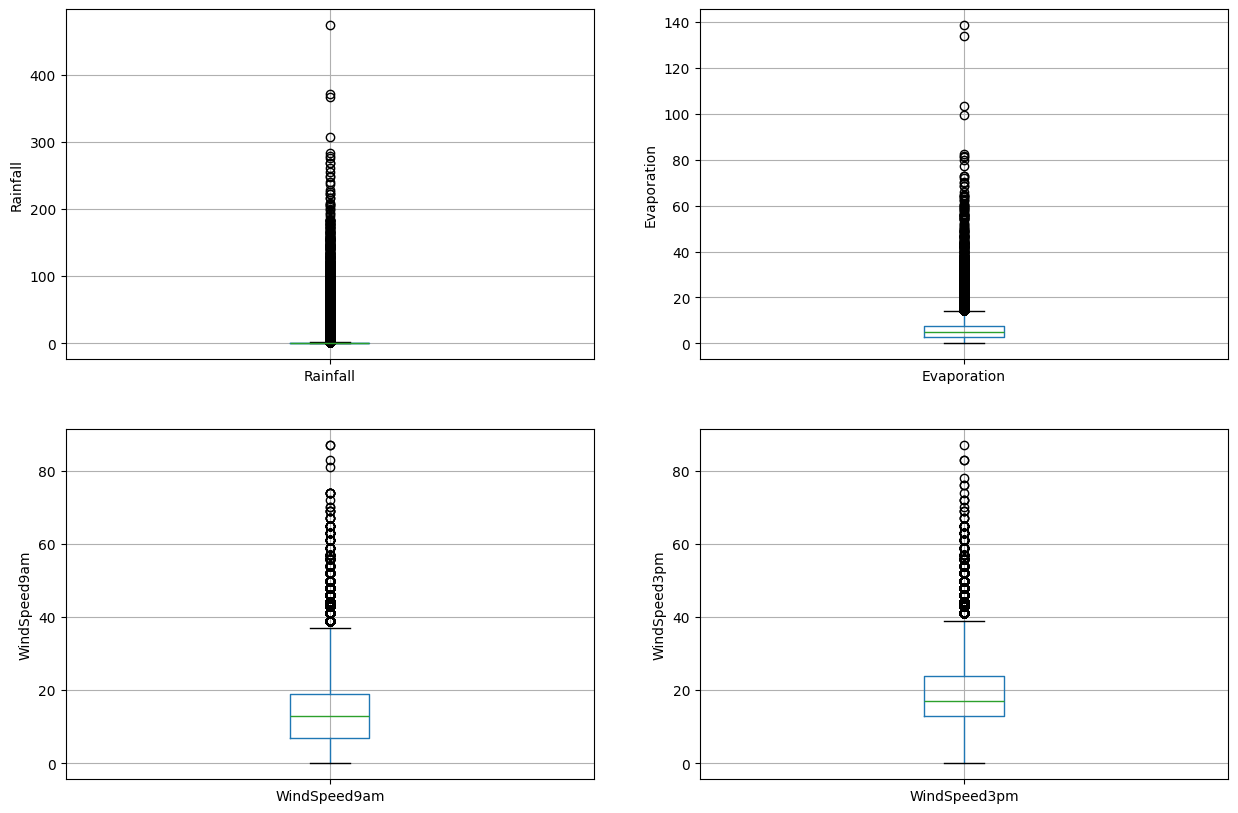

In [35]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

# Check the  distribution of variables 
Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR

Text(0, 0.5, 'RainTomorrow')

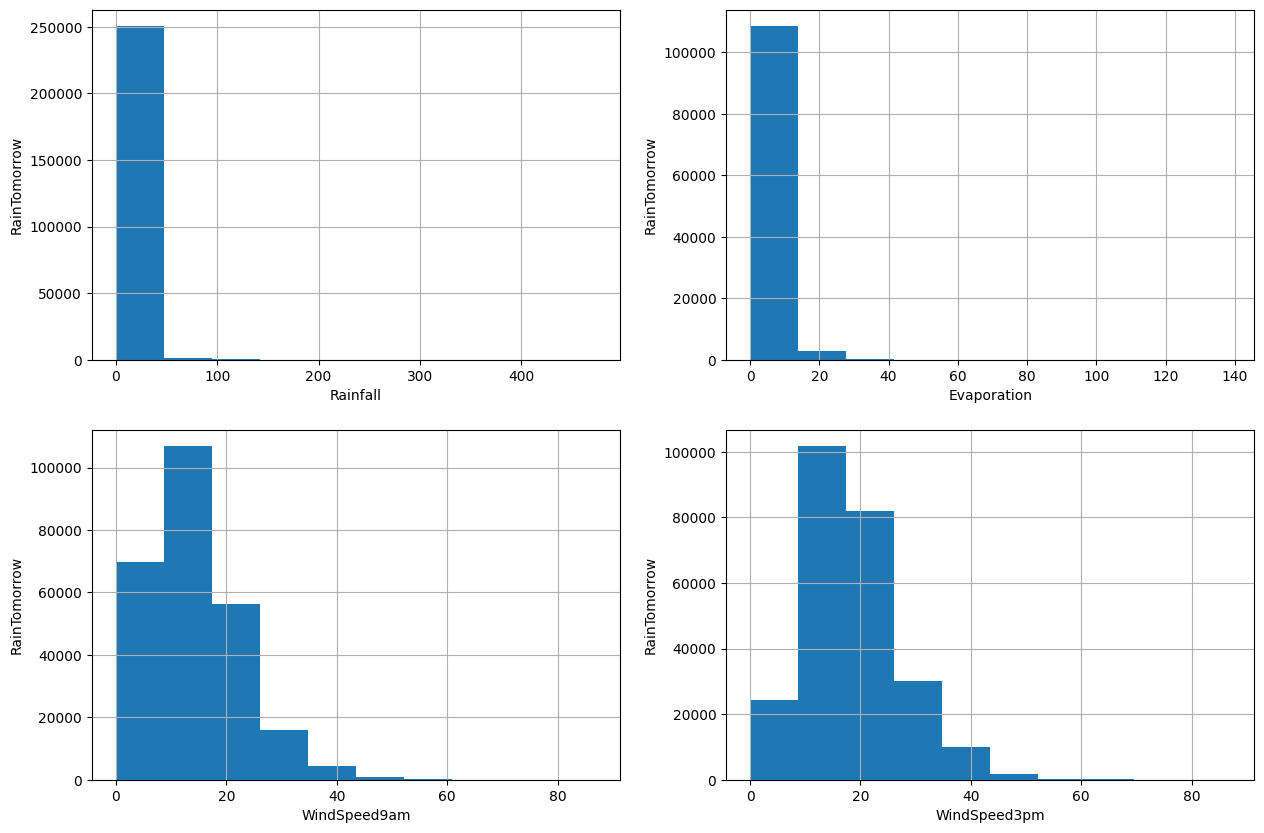

In [36]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')



We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.


In [37]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [38]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.75) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -6.4 or > 21.200000000000003


In [39]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.75) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -17.0 or > 55.0


In [40]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.75) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -9.0 or > 57.0


# Declare feature vector and target variable

In [41]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [42]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259903,Uluru,26.6,40.7,0.0,NaN,NaN,SSE,46.0,SSE,SE,...,34.0,14.0,1013.0,1009.7,2.0,NaN,29.8,39.5,No,2025
259904,Uluru,27.6,39.9,0.0,NaN,NaN,E,44.0,ESE,ESE,...,29.0,17.0,1015.7,1011.6,2.0,NaN,29.9,37.9,No,2025
259905,Uluru,24.9,41.4,0.0,NaN,NaN,E,39.0,ENE,S,...,21.0,14.0,1015.7,1011.4,NaN,NaN,30.6,39.8,No,2025
259906,Uluru,22.5,42.0,0.0,NaN,NaN,E,46.0,ESE,ESE,...,16.0,9.0,1015.8,1010.8,1.0,NaN,33.6,41.5,No,2025


In [43]:
y

0         No
1         No
2         No
3         No
4         No
          ..
259903    No
259904    No
259905    No
259906    No
259907    No
Name: RainTomorrow, Length: 259908, dtype: object

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
X_train.shape, X_test.shape

((207926, 22), (51982, 22))

In [46]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
dtype: object

In [47]:
categorical = [cool for cool in X_train.columns if X_train[cool].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [48]:
numerical = [cool for cool in X_train.columns if X_train[cool].dtypes != 'O' ]
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year']

In [49]:
X_train[numerical].isnull().sum()

MinTemp            3645
MaxTemp            3636
Rainfall           6337
Evaporation      118393
Sunshine         126866
WindGustSpeed     15292
WindSpeed9am       4347
WindSpeed3pm       7909
Humidity9am        4829
Humidity3pm        8797
Pressure9am       23061
Pressure3pm       23038
Cloud9am          94131
Cloud3pm          98945
Temp9am            3635
Temp3pm            7700
Year                  0
dtype: int64

In [50]:
X_test[numerical].isnull().sum()

MinTemp            955
MaxTemp            899
Rainfall          1622
Evaporation      29772
Sunshine         31818
WindGustSpeed     3754
WindSpeed9am      1108
WindSpeed3pm      1968
Humidity9am       1239
Humidity3pm       2181
Pressure9am       5599
Pressure3pm       5600
Cloud9am         23635
Cloud3pm         24859
Temp9am            957
Temp3pm           1914
Year                 0
dtype: int64

In [51]:
for col in numerical:
    if X_train[col].isnull().mean() > 0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0175
MaxTemp 0.0175
Rainfall 0.0305
Evaporation 0.5694
Sunshine 0.6101
WindGustSpeed 0.0735
WindSpeed9am 0.0209
WindSpeed3pm 0.038
Humidity9am 0.0232
Humidity3pm 0.0423
Pressure9am 0.1109
Pressure3pm 0.1108
Cloud9am 0.4527
Cloud3pm 0.4759
Temp9am 0.0175
Temp3pm 0.037


# Assumption

I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.


In [52]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [53]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
dtype: int64

In [54]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
dtype: int64

# Engineering missing values in categorical variables

In [55]:
def max_value(
	df3,
 	variable,
	top
)-> None:
    return np.where(df3[variable]>top, top, df3[variable])


for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)    

In [56]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(np.float64(3.2), np.float64(3.2))

In [57]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(np.float64(21.8), np.float64(21.8))

In [58]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(np.float64(21.8), np.float64(21.8))

In [59]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()


(np.float64(55.0), np.float64(55.0))

In [60]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(np.float64(57.0), np.float64(57.0))

In [61]:


X_train[numerical].describe()



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
count,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000
mean,12.111055,23.256256,0.654489,5.074938,8.160694,39.897247,14.004213,18.465646,69.103066,51.486514,1017.701934,1015.275418,5.313126,4.848499,16.950539,21.730975,2016.639949
std,6.370066,7.058832,1.171529,2.429626,2.396442,12.981801,8.725112,8.481789,19.152669,20.551627,6.678939,6.635990,2.232251,2.006459,6.468363,6.852871,4.828522
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,978.600000,972.000000,0.000000,0.000000,-6.000000,-5.100000,2007.000000
25%,7.600000,18.100000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.600000,1011.100000,5.000000,5.000000,12.300000,16.900000,2012.000000
50%,11.900000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.600000,1015.200000,6.000000,5.000000,16.700000,21.200000,2017.000000
75%,16.700000,28.100000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.400000,26.200000,2021.000000
max,33.900000,48.900000,3.200000,21.800000,14.400000,154.000000,55.000000,57.000000,100.000000,100.000000,1042.500000,1040.300000,8.000000,9.000000,39.400000,48.200000,2025.000000


We can now see that the outliers in Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns are capped.

# Encode categorical variables

In [62]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [63]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
132639,Nhil,ENE,NE,SSE,Yes
163451,GoldCoast,NaN,SE,E,No
60503,SydneyAirport,SSE,SSE,SSW,Yes
101669,Ballarat,NW,S,NW,No
248628,Darwin,NW,ENE,N,No


In [64]:
import category_encoders as ce

encoder =  ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
 

In [65]:
print(f'This is a encode category {X_train[:4]}')

This is a encode category              Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
132639           Nhil      6.7     12.8       3.2          4.8       8.5   
163451      GoldCoast     21.7     22.7       0.0          4.8       8.5   
60503   SydneyAirport     11.6     15.6       3.2          4.8       0.0   
101669       Ballarat      9.0     30.0       0.0          4.8       8.5   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  \
132639         ENE           54.0         NE        SSE  ...         79.0   
163451         NaN           39.0         SE          E  ...         72.0   
60503          SSE           89.0        SSE        SSW  ...         96.0   
101669          NW           35.0          S         NW  ...         26.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
132639        987.5        987.7       6.0       5.0      8.8     11.6   
163451       1013.8       1011.1       6.0       5.0     27

In [66]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year
132639,Nhil,6.7,12.8,3.2,4.8,8.5,ENE,54.0,NE,SSE,...,79.0,987.5,987.7,6.0,5.0,8.8,11.6,0,1,2022
163451,GoldCoast,21.7,22.7,0.0,4.8,8.5,NaN,39.0,SE,E,...,72.0,1013.8,1011.1,6.0,5.0,27.6,28.3,1,0,2016
60503,SydneyAirport,11.6,15.6,3.2,4.8,0.0,SSE,89.0,SSE,SSW,...,96.0,1001.9,1004.9,8.0,8.0,13.7,13.1,0,1,2014
101669,Ballarat,9.0,30.0,0.0,4.8,8.5,NW,35.0,S,NW,...,26.0,1013.5,1010.3,7.0,8.0,14.7,28.4,1,0,2023
248628,Darwin,23.4,33.3,0.0,6.2,10.9,NW,39.0,ENE,N,...,40.0,1014.6,1009.5,3.0,2.0,28.4,31.6,1,0,2014


We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

Now, I will create the X_train training s

In [67]:


X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
			pd.get_dummies(X_train.Location), 
			pd.get_dummies(X_train.WindGustDir),
			pd.get_dummies(X_train.WindDir9am),
			pd.get_dummies(X_train.WindDir3pm)], axis=1

)

In [68]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
132639,6.7,12.8,3.2,4.8,8.5,54.0,13.0,24.0,96.0,79.0,...,False,False,False,False,True,False,False,False,False,False
163451,21.7,22.7,0.0,4.8,8.5,39.0,7.0,24.0,80.0,72.0,...,False,False,False,False,False,False,False,False,False,False
60503,11.6,15.6,3.2,4.8,0.0,89.0,55.0,52.0,99.0,96.0,...,False,False,False,False,False,True,False,False,False,False
101669,9.0,30.0,0.0,4.8,8.5,35.0,9.0,17.0,91.0,26.0,...,False,True,False,False,False,False,False,False,False,False
248628,23.4,33.3,0.0,6.2,10.9,39.0,13.0,28.0,60.0,40.0,...,False,False,False,False,False,False,False,False,False,False




Similarly, I will create the X_test testing set.


In [69]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)



In [70]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
119911,13.8,19.9,0.0,5.6,3.3,46.0,17.0,26.0,62.0,53.0,...,False,False,False,False,True,False,False,False,False,False
10754,17.2,25.1,1.4,4.8,8.5,24.0,11.0,15.0,78.0,75.0,...,False,False,False,False,False,False,False,False,False,False
28704,8.0,21.7,0.0,4.8,8.5,39.0,19.0,17.0,49.0,52.0,...,False,False,False,False,False,False,False,False,False,False
9739,19.4,31.7,0.2,4.8,8.5,39.0,7.0,19.0,54.0,57.0,...,False,False,False,False,False,False,False,False,False,False
247855,16.0,30.2,0.0,5.6,10.7,28.0,15.0,15.0,61.0,32.0,...,True,False,False,False,False,False,False,False,False,False


# Feature Scaling

In [71]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,RainToday_0,RainToday_1
count,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000
mean,12.111055,23.256256,0.654489,5.074938,8.160694,39.897247,14.004213,18.465646,69.103066,51.486514,1017.701934,1015.275418,5.313126,4.848499,16.950539,21.730975,2016.639949,0.785958,0.244520
std,6.370066,7.058832,1.171529,2.429626,2.396442,12.981801,8.725112,8.481789,19.152669,20.551627,6.678939,6.635990,2.232251,2.006459,6.468363,6.852871,4.828522,0.410157,0.429803
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,978.600000,972.000000,0.000000,0.000000,-6.000000,-5.100000,2007.000000,0.000000,0.000000
25%,7.600000,18.100000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.600000,1011.100000,5.000000,5.000000,12.300000,16.900000,2012.000000,1.000000,0.000000
50%,11.900000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.600000,1015.200000,6.000000,5.000000,16.700000,21.200000,2017.000000,1.000000,0.000000
75%,16.700000,28.100000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.400000,26.200000,2021.000000,1.000000,0.000000
max,33.900000,48.900000,3.200000,21.800000,14.400000,154.000000,55.000000,57.000000,100.000000,100.000000,1042.500000,1040.300000,8.000000,9.000000,39.400000,48.200000,2025.000000,1.000000,1.000000


In [72]:
cols = X_train.columns
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', length=116)

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [74]:
print(f'This is a scale data train {X_train}\n this is a scale data test{X_test}')

This is a scale data train [[0.36150235 0.31886792 1.         ... 0.         0.         0.        ]
 [0.71361502 0.50566038 0.         ... 0.         0.         0.        ]
 [0.47652582 0.37169811 1.         ... 0.         0.         0.        ]
 ...
 [0.6713615  0.53018868 0.         ... 0.         0.         0.        ]
 [0.33568075 0.50566038 0.         ... 0.         0.         0.        ]
 [0.51643192 0.4245283  1.         ... 0.         0.         0.        ]]
 this is a scale data test[[0.52816901 0.45283019 0.         ... 0.         0.         0.        ]
 [0.60798122 0.5509434  0.4375     ... 0.         0.         0.        ]
 [0.39201878 0.48679245 0.         ... 0.         0.         0.        ]
 ...
 [0.40375587 0.33962264 1.         ... 0.         0.         0.        ]
 [0.47887324 0.60943396 0.         ... 0.         0.         0.        ]
 [0.33333333 0.33396226 0.0625     ... 0.         0.         1.        ]]


In [75]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [76]:
X_test = pd.DataFrame(X_train, columns=[cols])

In [77]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,...,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000,207926.000000
mean,0.488522,0.516156,0.204528,0.232795,0.566715,0.249324,0.254622,0.323959,0.691031,0.514865,...,0.052658,0.056698,0.066644,0.072333,0.062469,0.058112,0.061445,0.067346,0.060185,0.063912
std,0.149532,0.133186,0.366103,0.111451,0.166420,0.085407,0.158638,0.148803,0.191527,0.205516,...,0.223351,0.231265,0.249405,0.259040,0.242007,0.233956,0.240145,0.250621,0.237830,0.244597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.382629,0.418868,0.000000,0.220183,0.590278,0.190789,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483568,0.505660,0.000000,0.220183,0.590278,0.243421,0.236364,0.298246,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596244,0.607547,0.187500,0.220183,0.590278,0.289474,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model training

In [78]:

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


mask = y_train.notna()
X_train = X_train[mask]
y_train = y_train[mask]


In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0)


model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Predict results

In [80]:
y_pred_test = model.predict(X_test)

y_pred_test


array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [81]:
print(f'This is the data about the {y_pred_test}')

This is the data about the ['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']


# predict_proba method

predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form

In [82]:
model.predict_proba(X_test)[:,0]

array([0.0843735 , 0.65492454, 0.01736167, ..., 0.65735793, 0.95825147,
       0.47536125])

In [83]:
model.predict_proba(X_test)[:,1]

array([0.9156265 , 0.34507546, 0.98263833, ..., 0.34264207, 0.04174853,
       0.52463875])

# make web service

In [87]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [89]:
import mlflow
import mlflow.sklearn

2025/05/11 09:17:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


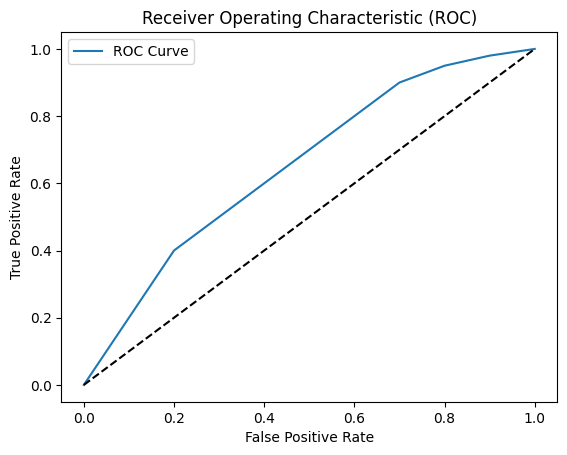

In [92]:
with mlflow.start_run():
    mlflow.log_param("model_type", "Logistic Regression") 
    mlflow.log_param("learning_rate", 0.01) 




    mlflow.sklearn.log_model(model, "logistic_regression_model") 


fpr = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
tpr = np.array([0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 1.0])

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.savefig("roc_curve.png")
mlflow.log_artifact("roc_curve.png")
